# Boosting & Random Forests

## Part 1: AdaBoost

First we visualize our data, this time creating a scatter plot comparing the bill length and bill depth measurements of the Chinstrap and Gentoo species.

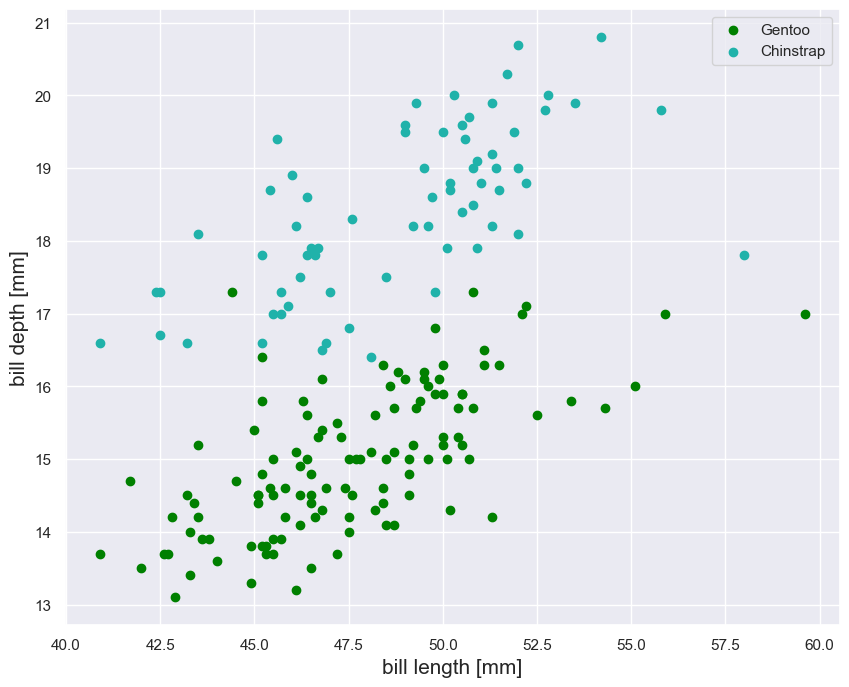

In [170]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor

sns.set_theme()

# Import the data
penguins = sns.load_dataset("penguins")
penguins = penguins.iloc[152:].dropna()

X = penguins[["bill_length_mm", "bill_depth_mm"]].dropna().to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1
    
# Create target value array
y = penguins["species"].map(make_labels).to_numpy()

# Plot the data
pengs = ["Gentoo", "Chinstrap"]
colors = ["green", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(pengs, colors):
    temp_df = penguins[penguins.species == species]
    ax.scatter(temp_df.bill_length_mm, temp_df.bill_depth_mm, c = color,label = species)
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()


Now, we divide our data and train an AdaBoost model using Decision Tree learners, with a max depth of 2. As shown below, this acheives a 96% accuracy, despite the trees being very shallow.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 19)

# import the learner we will be using, decision tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state=13), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)


dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)
print(f"AdaBoost Classification Report, Decision Tree")
print(classification_report(y_test, dt_y_pred), "\n")

AdaBoost Classification Report, Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.98      0.96      0.97        47

    accuracy                           0.96        75
   macro avg       0.95      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75
 



/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Additonally, we will use the ```SGDClassifier``` method to mimic a perceptron with a learning rate of 0.2. This leads to a highly variable accuracy. Running the code block below multiple times will reveal that the perceptron AdaBoost model can have an accuracy up to 95%, or perform worse than random guessing. This can be due to the randomness inherent to our model, as well as the fact that AdaBoost works by focusing more and more on misclassified points. If the base learner is unstable (like a perceptron with raw data), early errors get amplified.

In [101]:
from sklearn.linear_model import SGDClassifier

# AdaBoost with perceptron as base estimator
ada_clf = AdaBoostClassifier(SGDClassifier(loss="perceptron",  # behaves like Perceptron
                                penalty=None,       # no regularization
                                learning_rate="constant", 
                                eta0=1.0,            # learning rate (default for perceptron)
                                max_iter=1000, 
                                tol=1e-3, 
                                random_state=12),
                             n_estimators=10,
                             algorithm="SAMME", 
                             learning_rate=0.2)

# Fit and predict
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)

# Evaluation
print("AdaBoost with Perceptron Base Classifier")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost with Perceptron Base Classifier
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        47

    accuracy                           0.96        75
   macro avg       0.95      0.97      0.96        75
weighted avg       0.96      0.96      0.96        75
 



Plotting a comparison of the two models reveals how vastly different their decision boundaries are. While the Decison Tree version leads to higher accuracy, perhaps the Perceptron version gives a more elegant solution for this dataset.

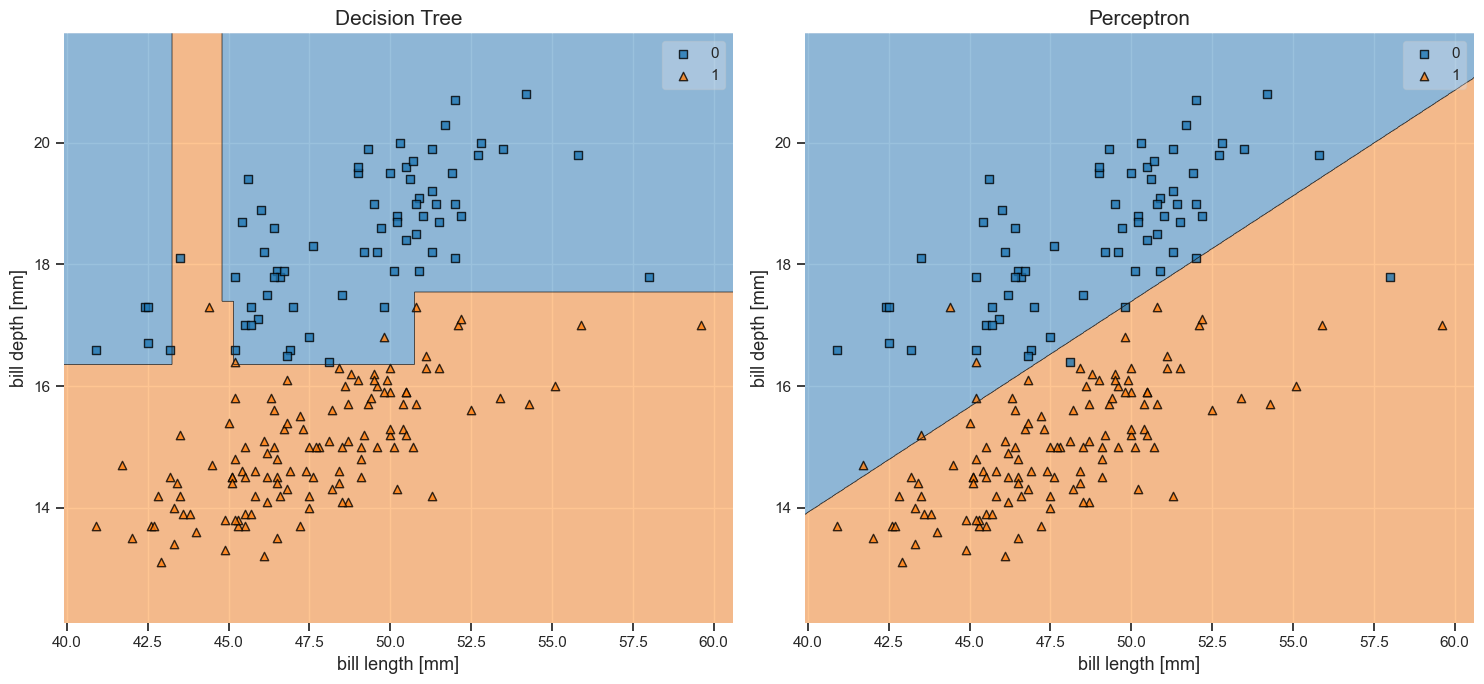

In [102]:
from mlxtend.plotting import plot_decision_regions

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot on ax1
plt.sca(ax1)
plot_decision_regions(X, y, clf=dt_clf)
ax1.set_title("Decision Tree", fontsize=15)
ax1.set_xlabel("bill length [mm]", fontsize=13)
ax1.set_ylabel("bill depth [mm]", fontsize=13)

# Plot on ax2
plt.sca(ax2)
plot_decision_regions(X, y, clf=ada_clf)
ax2.set_title("Perceptron", fontsize=15)
ax2.set_xlabel("bill length [mm]", fontsize=13)
ax2.set_ylabel("bill depth [mm]", fontsize=13)

plt.tight_layout()
plt.show()


Now we will introduce more features into our input vector. This does not seem to vastly improve accuracy for this dataset, although this oculd be due to the fact that the data already appears linearly separable, so including more features may not make a large impact.

In [103]:
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].dropna().to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 12)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.93      1.00      0.96        41

    accuracy                           0.96        75
   macro avg       0.97      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75
 



/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For the Perceptron, we actually see a drop in accuracy. Additionally, it became necessary to decrease the learning rate, as the previous learning rate seemed to lead to instability (and many errors). 

In [105]:
# AdaBoost with perceptron as base estimator
ada_clf = AdaBoostClassifier(SGDClassifier(loss="perceptron",  # behaves like Perceptron
                                penalty=None,       # no regularization
                                learning_rate='constant', 
                                eta0=1.0,            # learning rate (default for perceptron)
                                max_iter=1000, 
                                tol=1e-3, 
                                random_state=42),
                             n_estimators=10,
                             algorithm="SAMME", 
                             learning_rate=0.1)

# Fit and predict
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)

# Evaluation
print("AdaBoost with Perceptron Base Classifier")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost with Perceptron Base Classifier
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        34
           1       0.80      1.00      0.89        41

    accuracy                           0.87        75
   macro avg       0.90      0.85      0.86        75
weighted avg       0.89      0.87      0.86        75
 



## Part 2: Gradient Boosting

The following code generates and visualizes a synthetic nonlinear dataset over the unit interval (with some added noise).

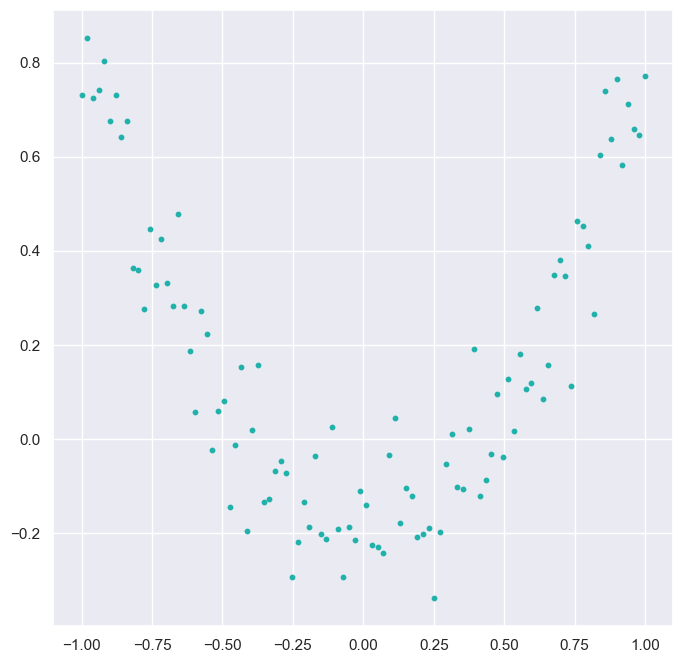

In [135]:
np.random.seed(13)

X = np.linspace(-1, 1, 100)

y = (X ** 2) + np.random.normal(-.19, .11, 100)

plt.figure(figsize=(8, 8))
plt.scatter(X, y, s=10, color = "lightseagreen")
plt.show()

After reshaping and partitioning the data, we will create 3 decision trees, each with a maximum depth of 2. Each decision tree will use the errors of the previous tree as its training data, to predict what the previous tree(s) missed in order to successively reduce the residuals (errors).

In [138]:
X1 = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 37)

tree1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree1.fit(X_train, y_train)

y2 = y_train - tree1.predict(X_train)

tree2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree2.fit(X_train, y2)

y3 = y2 - tree2.predict(X_train)

tree3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

Below we plot the error reduction process. The graph on the right clearly best matches the pattern of the data.

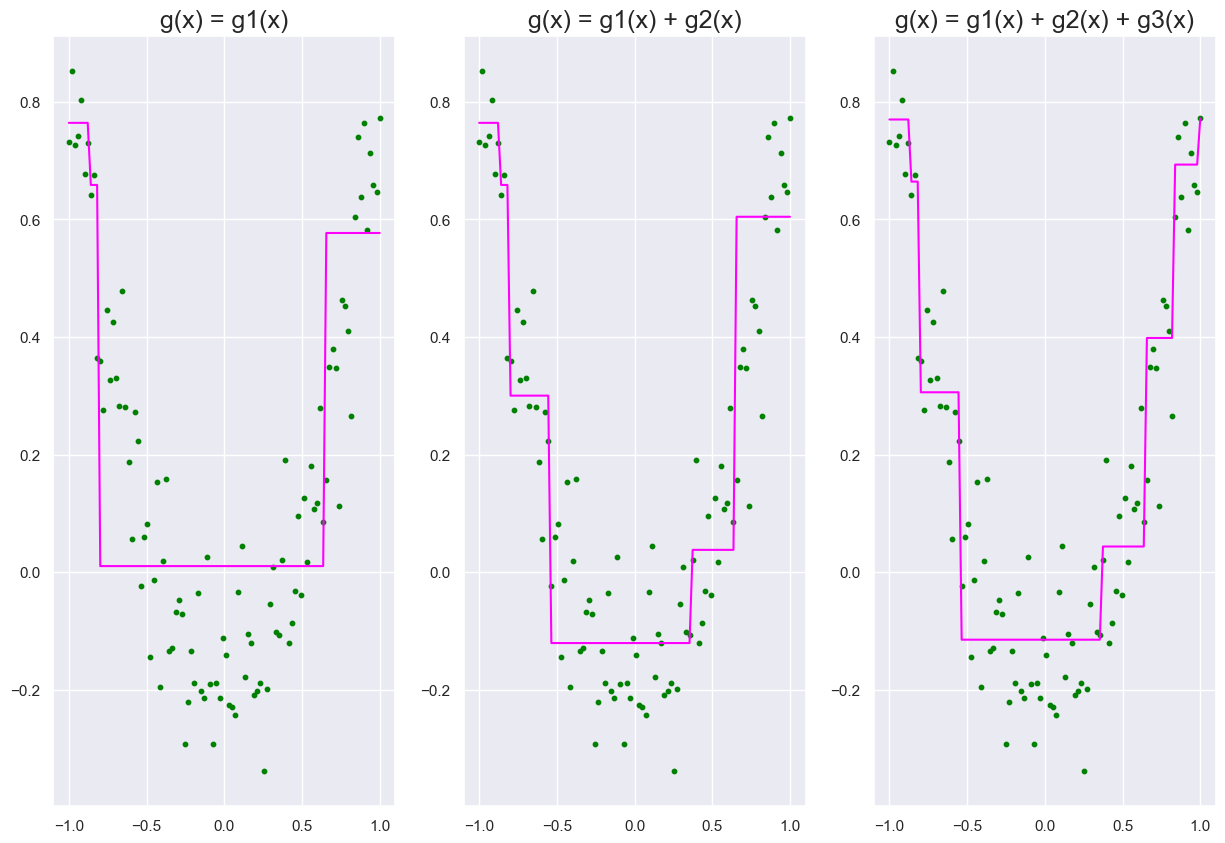

In [147]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.scatter(X, y, s=10, color = "green")
ax1.plot(X, tree1.predict(X1), color = "magenta")
ax1.set_title("g(x) = g1(x)", fontsize = 18)

ax2.scatter(X, y, s=10, color = "green")
ax2.plot(X, tree1.predict(X1)+tree2.predict(X1), color = "magenta")
ax2.set_title("g(x) = g1(x) + g2(x)", fontsize = 18)

ax3.scatter(X, y, s=10, color = "green")
ax3.plot(X, tree1.predict(X1)+tree2.predict(X1)+tree3.predict(X1), color = "magenta")
ax3.set_title("g(x) = g1(x) + g2(x) + g3(x)", fontsize = 18)
plt.show()

Finally, we will use the `GradientBoostingRegressor` method to create a model where we can easiliy alter the number of estimators and the learning rate.

In [158]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth = 2, n_estimators = 40, learning_rate=0.10, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X1)

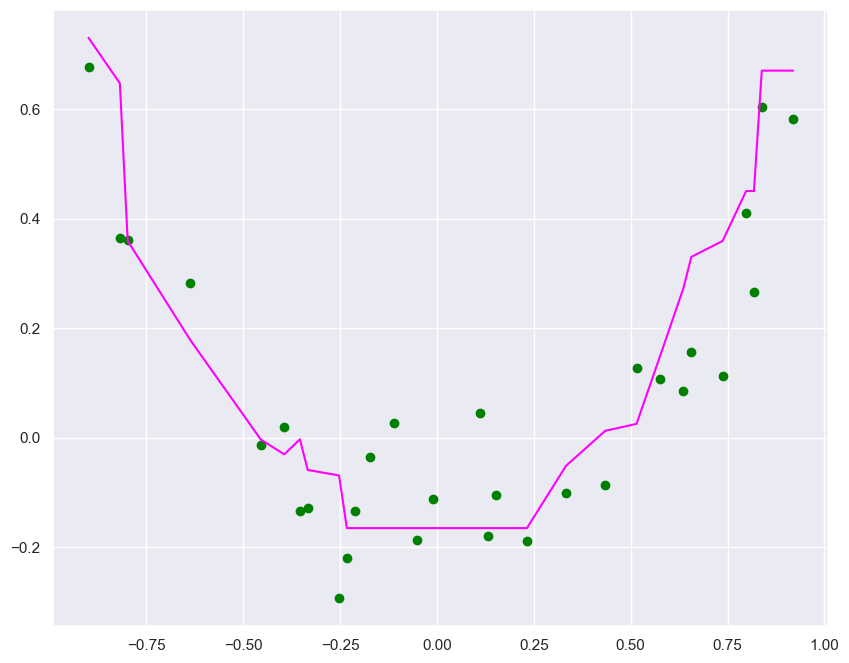

In [162]:
y_pred = gb_reg.predict(X_test)
points = [(x[0], y, z) for x, y, z in zip(X_test, y_pred, y_test)]
points.sort(key = lambda x : x[0])
X_new_test, y_new_pred, y_new_test = np.array([x[0] for x in points]), np.array([x[1] for x in points]), np.array([x[2] for x in points])
X_new_test = X_new_test.reshape(-1, 1)

 
plt.figure(figsize=(10, 8))
plt.scatter(X_new_test, y_new_test, color = "green")
plt.plot(X_new_test, y_new_pred, color = "magenta")
plt.show()

### Conclusion (Boosting)

- The AdaBoost model performed better with Decision Tree learners, producing a very accurate prediction. One area for future study could be analyzing how the maximum depth of the tree impacts the model (perhaps it could cause overfitting, etc). The Perceptron learners proved to be unstable, which is likely due to AdaBoost's tendency to focus on missclasified points. Because the Perceptron can only output a single line in its decision boundary, outliers can affect it strongly in this model.
- The Gradient Boost Model also fit the data nicely. One aspect that I found challenging was manipulating the number of estimators and the learning rate in order to find an ideal balance that matches the curve, but does not overfit. I found that 40 estimators, with a learning rate of 0.10 produced a nice quartic shape, that was not heavily influenced by outliers.

## Part 3: Random Forests

We will now use a Random Forest model to attempt to classify penguins as either Gentoo or Chinstrap based on their flipper length and body mass (visualized in the scatter below).

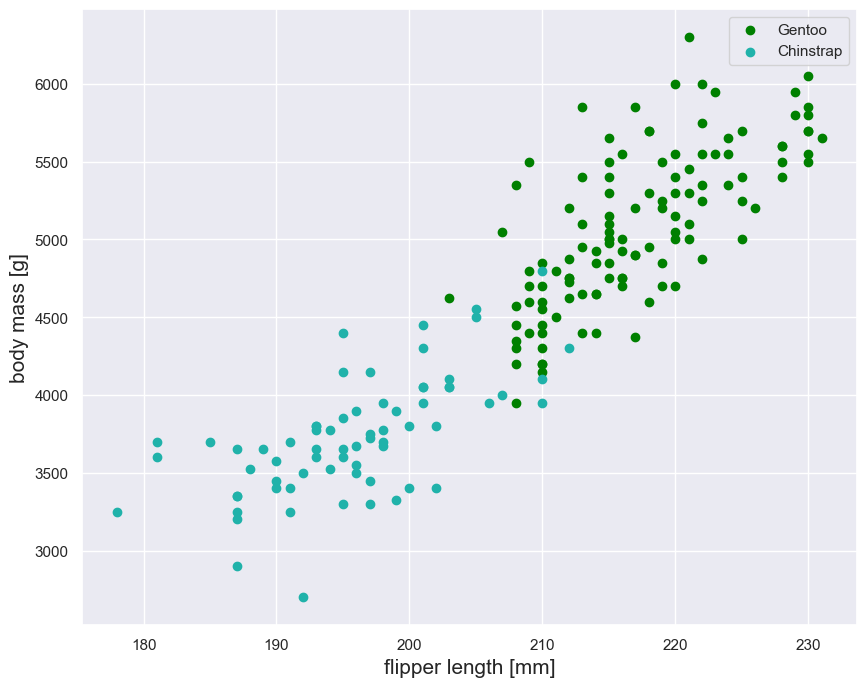

In [194]:
# import the ensemble method we will use
from sklearn.ensemble import RandomForestClassifier

X = penguins[["flipper_length_mm", "body_mass_g"]].dropna().to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1
    
# Create target value array
y = penguins["species"].map(make_labels).to_numpy()

# Plot the data
pengs = ["Gentoo", "Chinstrap"]
colors = ["green", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(pengs, colors):
    temp_df = penguins[penguins.species == species]
    ax.scatter(temp_df.flipper_length_mm, temp_df.body_mass_g, c = color,label = species)
    
ax.set_xlabel("flipper length [mm]", fontsize = 15)
ax.set_ylabel("body mass [g]", fontsize = 15)
ax.legend()
plt.show()

Now, we will train two models using the random forest classifier method, the first with 350 decision trees of maximum depth 1 (aka 'decision stumps') and the second with 50 trees of maximum depth 2. As we can see from the report, increasing the max depth improves the accuracy even when drastically reducing the number of trees. This shows that there's diminishing return on adding weak learners. A fewer number of deeper trees can outperform many shallow ones if they capture richer information.

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 18)

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 350, bootstrap = True, n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

forest_clf1 = RandomForestClassifier(max_depth = 2, n_estimators = 50, bootstrap = True, n_jobs = -1)
forest_clf1.fit(X_train, y_train)
forest_y_pred1 = forest_clf1.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred1))

Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        28
           1       0.91      1.00      0.95        29

    accuracy                           0.95        57
   macro avg       0.95      0.95      0.95        57
weighted avg       0.95      0.95      0.95        57
 

Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        29

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



---
Visualizing our decision boundaries produces interesting results- though both models have similar accuracy, they produce significantly different boundaries! This demonstrates just how different the underlying 'geometries' of the models are.

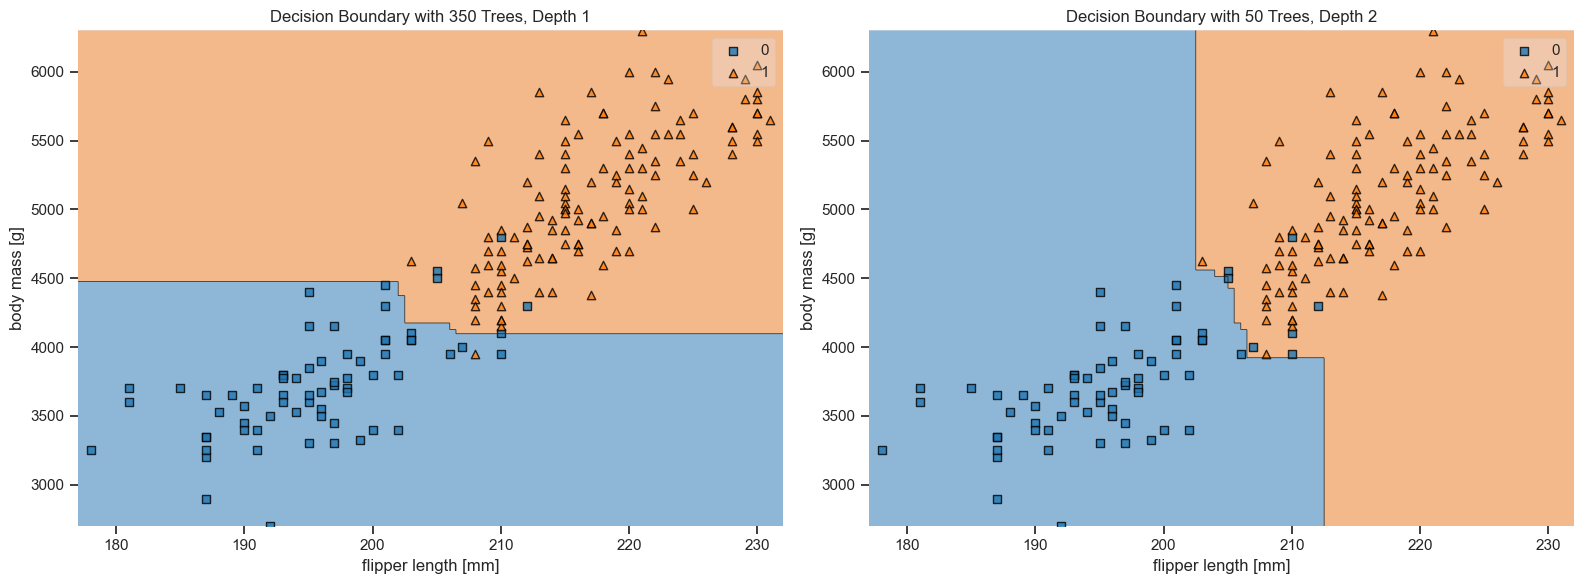

In [198]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# First tree plot
plot_decision_regions(X, y, clf=forest_clf, ax=axes[0])
axes[0].set_title("Decision Boundary with 350 Trees, Depth 1")
axes[0].set_xlabel("flipper length [mm]", fontsize=12)
axes[0].set_ylabel("body mass [g]", fontsize=12)
axes[0].grid()

# Second tree plot
plot_decision_regions(X, y, clf=forest_clf1, ax=axes[1])
axes[1].set_title("Decision Boundary with 50 Trees, Depth 2")
axes[1].set_xlabel("flipper length [mm]", fontsize=12)
axes[1].set_ylabel("body mass [g]", fontsize=12)
axes[1].grid()

plt.tight_layout()
plt.show()

In [215]:
# Now use all 4 features for input vector
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()

# partition data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state = 5)

forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

forest_clf1.fit(X_train, y_train)
forest_y_pred1 = forest_clf1.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred1), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.96      1.00      0.98        43

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.98      0.99        43

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75
 



Using all 4 features provides even more accurate predictions, with the second model able to categorize 99% of data points correctly! Below we can see the weights of each of the features. This helps clarify the differences between the two models. The model with 2 layers is a bit more balanced than the shallower model, which makes sense as each attribute has many more oppurtunites to be used in a decision node's inequality and thus contribute to reducing impurity.

Notably, bill length plays a negligible part in both models, suggesting it is not a good indicator of species for the Chinstrap and Gentoo penguins.

In [211]:
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for feature, score in zip(features, forest_clf.feature_importances_):
    print(feature, score)

bill_length_mm 0.0
bill_depth_mm 0.32
flipper_length_mm 0.4857142857142857
body_mass_g 0.19428571428571428


In [212]:
for feature, score in zip(features, forest_clf1.feature_importances_):
    print(feature, score)

bill_length_mm 0.007788076801566263
bill_depth_mm 0.3745626968343603
flipper_length_mm 0.3787134620996207
body_mass_g 0.23893576426445284


### Conclusion
- Random forests demonstrate how a combination of many simplistic models is able to produce a larger model that performs very well. We can see that each additional layer of depth affect results much more than each additional tree in the forest. We also can see that (at least for this model) flipper length is the most important feature in classifying the penguins.